In [1]:
import sys
sys.path.insert(0, "/home/pidoux/MASTER/ML/projet/Projet/Module")

from Loss import *
from Linear import *
from Activation import *
from Sequential import *
from mltools import *

import matplotlib.pyplot as plt
import random
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from keras.datasets import fashion_mnist

def onehot(x):
    out = [0] * 10
    out[x] = 1
    return out

2023-05-02 23:08:11.784736: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-02 23:08:11.860850: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-02 23:08:11.862908: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-02 23:08:15.058612: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [133]:
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
#vectoriser l'image et normaliser
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# selectionner un sous ensemble
X_train = X_train[:2000]
y_train = y_train[:2000]
X_test = X_test[:1000]
y_test = y_test[:1000]
y_train2 = y_train
y_train = np.asarray([onehot(y) for y in y_train])


# paramétrer le modèle
d = X_train.shape[1]
print(d)
d_prime = 100
d_prime2 = 16
out = 784
epoch = 2000
gradient_step = 0.00001
batchsize = 500
lin = Linear(d, d_prime)
lin2 = Linear(d_prime, d_prime2)
lin3 = Linear(d_prime2, d_prime)
lin4 = Linear(d_prime, out)
lin3._parameters = lin2._parameters.T
lin4._parameters = lin._parameters.T
tan = TanH()
sig = Sigmoide()
loss = MSELoss()

Encodeur = [lin,tan,lin2,tan]
Decodeur = [lin3,tan,lin4,sig]

net = Sequential(Encodeur + Decodeur)

opt = Optim(net,loss,gradient_step)
L = opt.SGD(X_train,X_train,batchsize,epoch)

784


100%|██████████| 2000/2000 [17:44<00:00,  1.88it/s]


In [134]:
compressed_train = opt._net.forward(X_train)[3]
reconstructed_train = opt._net.forward(X_train)[7]
compressed_test = opt._net.forward(X_test)[3]
reconstructed_test = opt._net.forward(X_test)[7]

In [135]:
colors = ['Top','Pantalon','Pull','Robe','Manteau','Sandale','Chemise','Basket','Sac','Botte']
dico = {'0':'Top','1':'Pantalon','2':'Pull','3':'Robe','4':'Manteau','5':'Sandale','6':'Chemise','7':'Basket','8':'Sac','9':'Botte'}
dico3 = {'Top':'Top', 'Pantalon':'Pantalon', 'Pull':'Pull', 'Robe':'Robe', 'Manteau':'Manteau', 'Sandale':'Sandale', 'Chemise':'Chemise', 'Basket':'Basket', 'Sac':'Sac', 'Botte':'Botte' }

In [136]:
import pandas as pd

In [137]:
df = pd.DataFrame(vectorizer(y_train2), index = [i for i in range(len(X_train))], columns = ['shape'])
df2 = pd.DataFrame(vectorizer(y_test), index = [i for i in range(len(X_test))], columns = ['shape'])

In [138]:
import plotly.express as px

from sklearn.manifold import TSNE
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

tsne = TSNE(n_components=2,perplexity=10, random_state=42)
t_train= tsne.fit_transform(X_train)
fig = px.scatter(df,x=t_train[:,0], y=t_train[:,1], color='shape', labels=dico3, category_orders={"shape": ['Top','Pantalon','Pull','Robe','Manteau','Sandale','Chemise','Basket','Sac','Botte']})
fig.show()

In [139]:
tsne = TSNE(n_components=2,perplexity=10, random_state=42)
t_compressed = tsne.fit_transform(compressed_train)
fig = px.scatter(df,x=t_compressed[:,0], y=t_compressed[:,1], color='shape', labels=dico3, category_orders={"shape": ['Top','Pantalon','Pull','Robe','Manteau','Sandale','Chemise','Basket','Sac','Botte']})
fig.show()


In [140]:
tsne = TSNE(n_components=2,perplexity=10, random_state=42)
t_compressed = tsne.fit_transform(reconstructed_train)
fig = px.scatter(df,x=t_compressed[:,0], y=t_compressed[:,1], color='shape', labels=dico3, category_orders={"shape": ['Top','Pantalon','Pull','Robe','Manteau','Sandale','Chemise','Basket','Sac','Botte']})
fig.show()

In [141]:
colors = ['Top','Pantalon','Pull','Robe','Manteau','Sandale','Chemise','Basket','Sac','Botte']
tsne = TSNE(n_components=2,perplexity=10, random_state=42)
t_test= tsne.fit_transform(X_test)
fig = px2.scatter(df2,x=t_test[:,0], y=t_test[:,1], color='shape', labels=dico3, category_orders={"shape": ['Top','Pantalon','Pull','Robe','Manteau','Sandale','Chemise','Basket','Sac','Botte']})
fig.show()

In [142]:
tsne = TSNE(n_components=2,perplexity=10, random_state=42)
t_compressed2 = tsne.fit_transform(compressed_test)
fig = px2.scatter(df2,x=t_compressed2[:,0], y=t_compressed2[:,1], color='shape', labels=dico3, category_orders={"shape": ['Top','Pantalon','Pull','Robe','Manteau','Sandale','Chemise','Basket','Sac','Botte']})
fig.show()

In [143]:
tsne = TSNE(n_components=2,perplexity=10, random_state=42)
t_compressed2 = tsne.fit_transform(reconstructed_test)
fig = px2.scatter(df2,x=t_compressed2[:,0], y=t_compressed2[:,1], color='shape', labels=dico3, category_orders={"shape": ['Top','Pantalon','Pull','Robe','Manteau','Sandale','Chemise','Basket','Sac','Botte']})
fig.show()

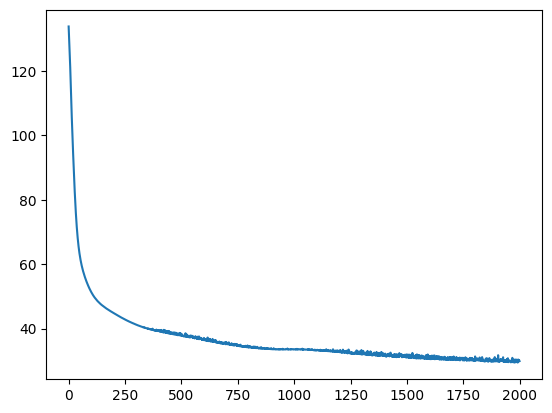

In [144]:
plt.plot(L)

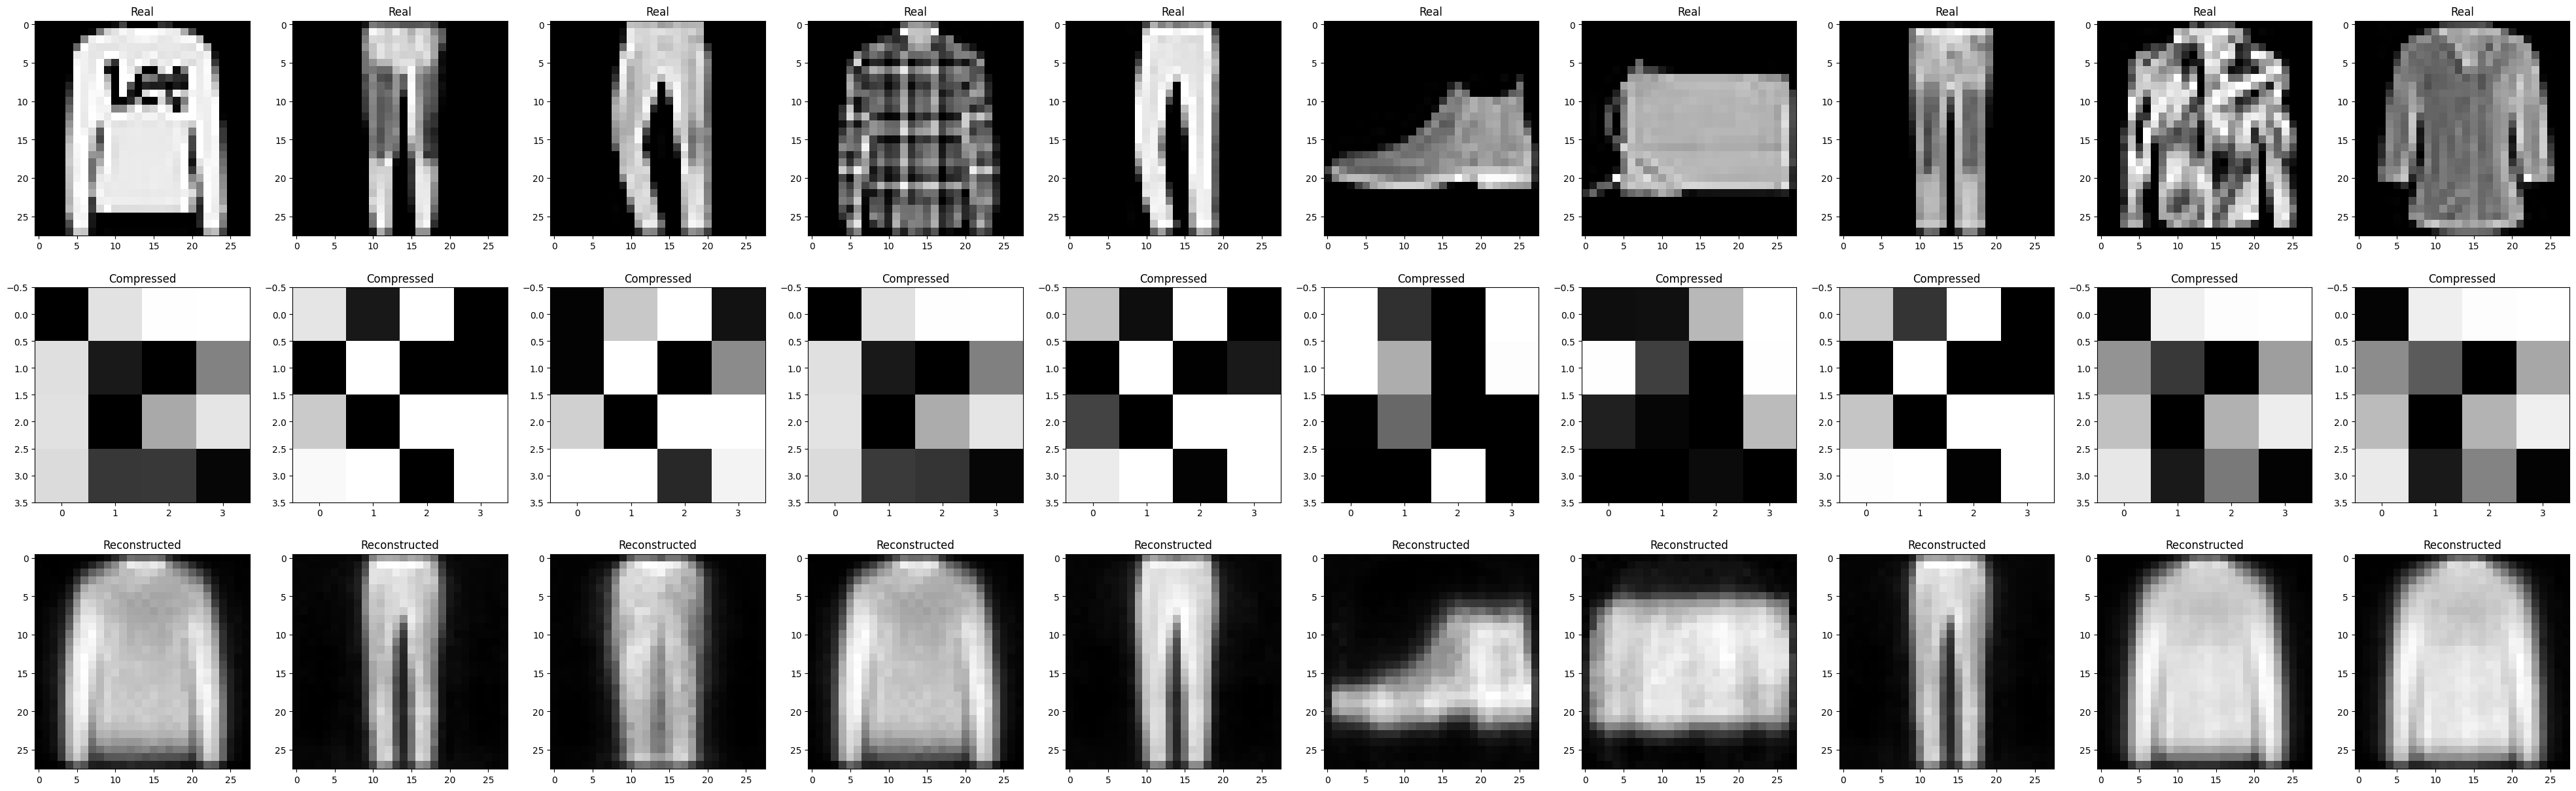

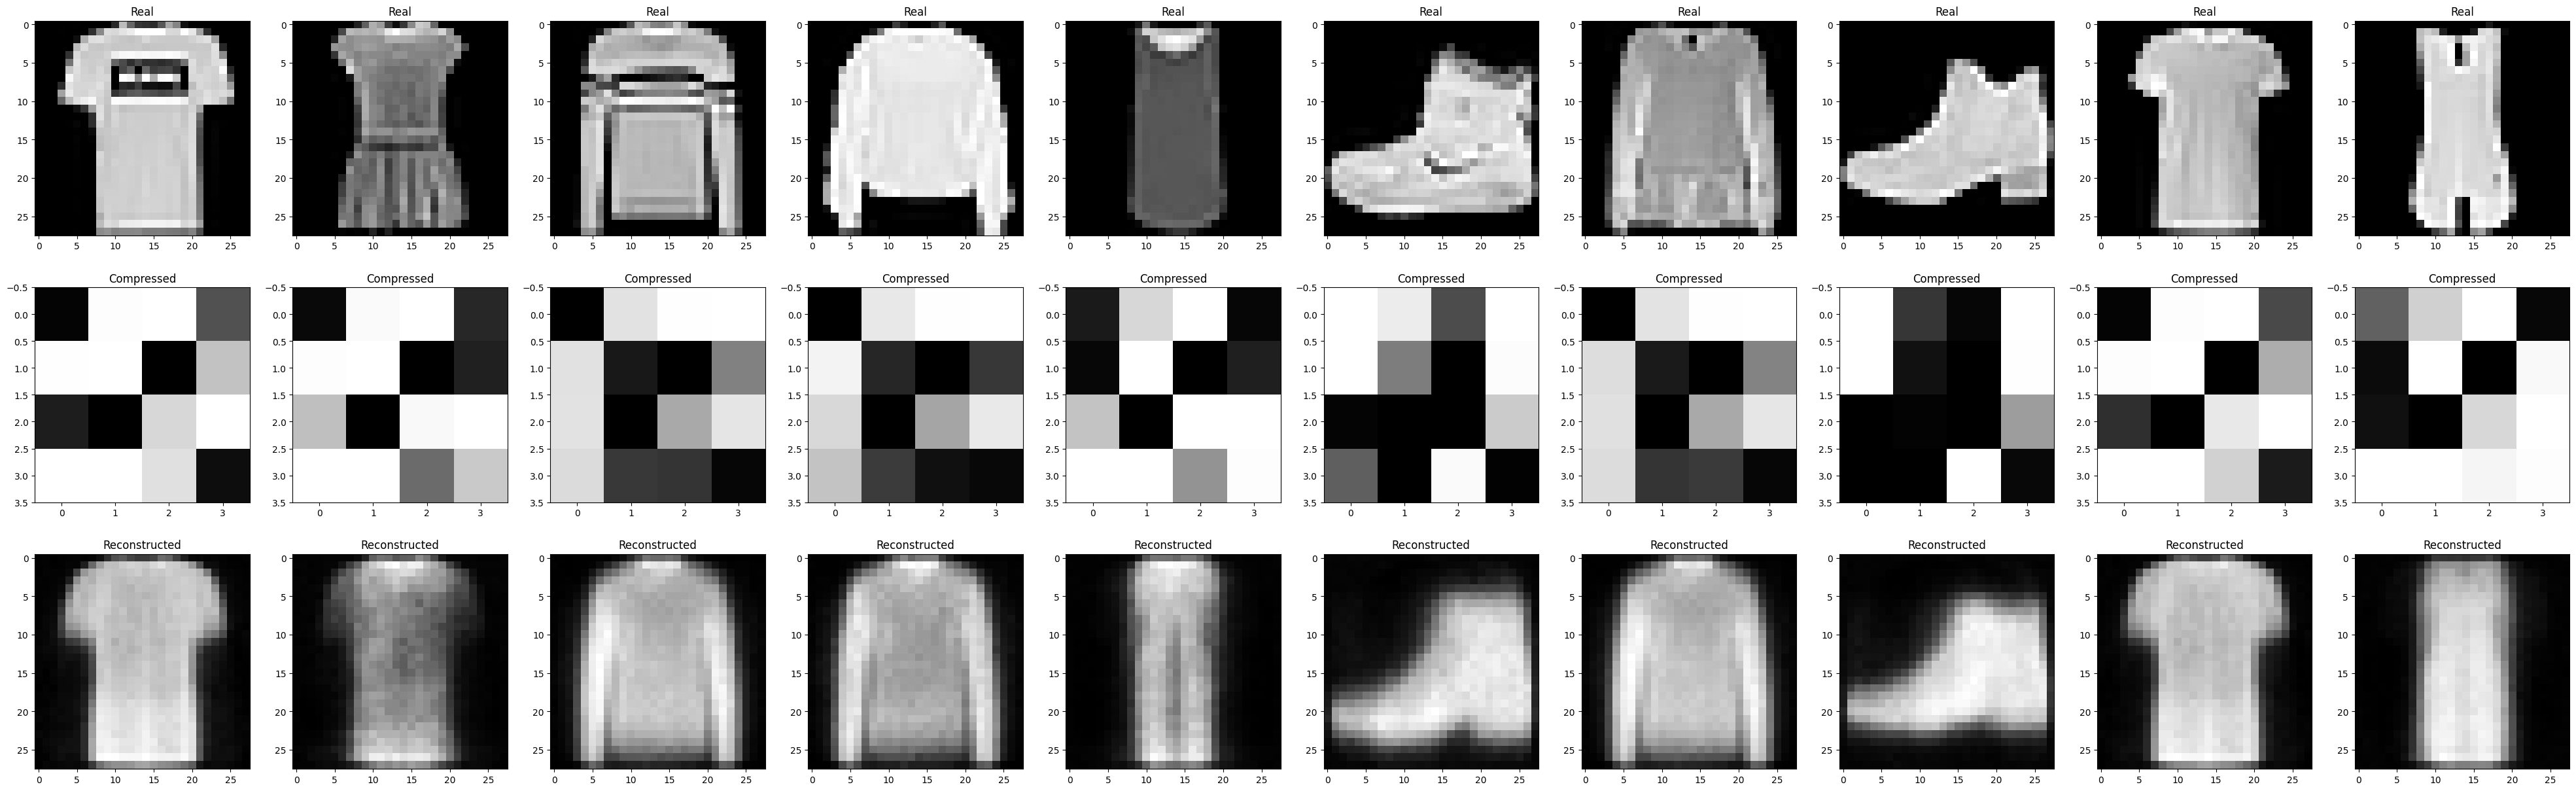

In [145]:
draw_construction(X_test,opt._net,n_comp=4)
plt.show()
plt.close()
draw_construction(X_train,opt._net,n_comp=4)

In [146]:

liste=[]
for i in range(len(X_test)):
    liste.append(np.linalg.norm(X_test[i]-reconstructed_test[i]))
print(np.mean(liste))
print(np.std(liste))

5.376518556377995
1.4117482112239492


In [150]:
import scipy.stats as stats
v = [np.array([3.81,3.87,4.52,4.53,5.26]),np.array([4.1,4.55,4.92,4.67,5.37])]
stats.wilcoxon(v[0], v[1], alternative='less')

WilcoxonResult(statistic=0.0, pvalue=0.03125)